# Lecture 1

## Introduction to [Regressions](#regression)
 - binary means (close vs far)         
 - pre-specified categories with means 
 - non-parametric regression (lowess)  
 - simple linear regression (OLS)  
 - analysis of the results
 - Log models
                                     
#### Case-study:                           
- Hotels Vienna          
                                     
#### Dataset:                              
- hotels-vienna


___

## Introduction to Regression<a class = 'anchor' id = 'regression'></a>

In [8]:
!python -m pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3


In [9]:
!pip --version

pip 24.3.1 from C:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)



In [10]:
!pip install patchworklib

In [14]:
!pip install patchworklib --user

In [2]:
import warnings

import numpy as np
import pandas as pd
import patchworklib as pw
from plotnine import *
from skimpy import skim

%matplotlib inline
warnings.filterwarnings("ignore")

<Figure size 100x100 with 0 Axes>

Import packages

From OSF import hotel-vienna data

In [3]:
hotels = pd.read_csv("hotels-vienna.csv")

In [3]:
hotels

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,...,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Austria,Vienna,2.0,City centre,Donauturm,Wieden,109,Vienna,3.0,3.0,...,50%-75% offer,2017,11,0,0,1.5,3.8,Apartment,1,5.0
424,Austria,Vienna,145.0,City centre,Donauturm,Wieden,185,Vienna,5.0,4.0,...,15-50% offer,2017,11,0,0,0.8,3.6,Hotel,1,4.3
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,0% no offer,2017,11,0,0,1.0,3.7,Hotel,1,4.4
426,Austria,Vienna,169.0,City centre,Donauturm,Wieden,58,Vienna,3.0,3.0,...,15-50% offer,2017,11,0,0,1.4,4.1,Hotel,1,3.2


Apply filters:  3-4 stars, Vienna actual, without  extreme prices

In [4]:
hotels = (
    hotels.loc[lambda x: x["accommodation_type"] == "Hotel"]
    .loc[lambda x: x["city_actual"] == "Vienna"]
    .loc[lambda x: x["stars"] >= 3]
    .loc[lambda x: x["stars"] <= 4]
    .loc[lambda x: x["stars"].notnull()]
    .loc[lambda x: x["price"] <= 600]
)

In [5]:
hotels

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,0% no offer,2017,11,0,0,0.9,2.4,Hotel,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Austria,Vienna,77.0,City centre,Donauturm,Wieden,100,Vienna,3.0,4.0,...,1-15% offer,2017,11,0,0,1.2,3.7,Hotel,1,4.0
421,Austria,Vienna,572.0,City centre,Donauturm,Wieden,95,Vienna,4.0,4.0,...,1-15% offer,2017,11,0,0,1.5,3.9,Hotel,1,4.1
422,Austria,Vienna,53.0,City centre,Donauturm,Wieden,73,Vienna,3.0,3.0,...,1-15% offer,2017,11,0,0,1.5,4.0,Hotel,1,3.4
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,0% no offer,2017,11,0,0,1.0,3.7,Hotel,1,4.4


Summary statistics on price and distance

In [5]:
hotels.filter(["price", "distance"]).describe(percentiles=[0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
price,207.0,109.975845,42.221381,50.0,82.0,100.0,129.5,183.4,383.0
distance,207.0,1.529952,1.161507,0.0,0.8,1.3,1.9,3.9,6.6


In [7]:
skim(hotels.filter(["price","distance"]))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 207    │ │ int32       │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean    ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ price            │    0 │       0 │     110 │    42.22 │   50 │    82 │   100 │   129.5 │    383 │   ▇▅▁   │  │
│ │ distance         │    0 │       0 │    1.53 │    1.162 │    0 │   0.8 │   1.3 │     1.9 │    6.6 │  ▇▇▁▂   │  │
│ └──────────────────┴──────┴─────────┴─────────┴──────────┴──────┴───────┴───────┴─────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Graphical investigation: \
create a base scatter-plot between price and distance

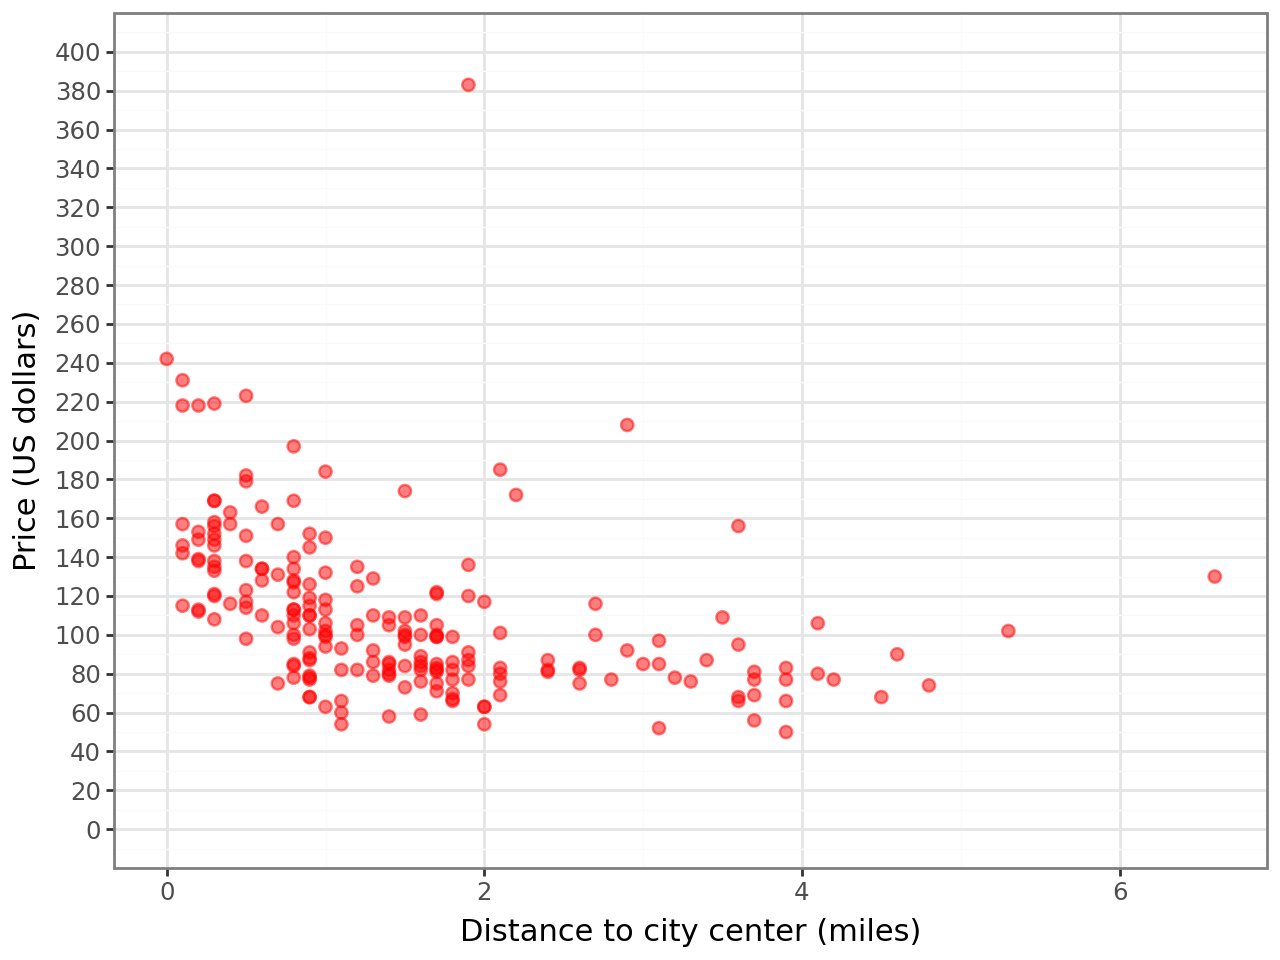

In [26]:
p1 = (
    ggplot(data=hotels)
    + geom_point(aes(x="distance", y="price"), color="red", size=2, alpha=0.5)
    + expand_limits(x=0.01, y=0.01)
    + scale_y_continuous(
        expand=(0.05, 0.05), limits=(0, 400), breaks=np.arange(0, 401, 20)
    )
    + labs(x="Distance to city center (miles)", y="Price (US dollars)")
    + theme_bw()
)
p1

### Binary Variable

Close vs Far away hotels with a binary variable: 
 - if further away from 2 miles, consider as 'far', otherwise 'close'

In [6]:
hotels["dist2"] = np.where(hotels["distance"] >= 2, "Far", "Close")
hotels["Eprice_cat2"] = hotels.groupby("dist2")["price"].transform("mean")

In [7]:
hotels

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating,dist2,Eprice_cat2
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,11,0,0,1.7,3.8,Hotel,1,3.9,Close,116.426752
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,11,0,0,1.4,2.5,Hotel,1,3.7,Close,116.426752
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,11,0,0,1.7,2.5,Hotel,1,4.0,Close,116.426752
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,11,0,0,1.2,2.8,Hotel,1,3.9,Close,116.426752
6,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,103,Vienna,4.0,3.5,...,11,0,0,0.9,2.4,Hotel,1,3.9,Close,116.426752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Austria,Vienna,77.0,City centre,Donauturm,Wieden,100,Vienna,3.0,4.0,...,11,0,0,1.2,3.7,Hotel,1,4.0,Close,116.426752
421,Austria,Vienna,572.0,City centre,Donauturm,Wieden,95,Vienna,4.0,4.0,...,11,0,0,1.5,3.9,Hotel,1,4.1,Close,116.426752
422,Austria,Vienna,53.0,City centre,Donauturm,Wieden,73,Vienna,3.0,3.0,...,11,0,0,1.5,4.0,Hotel,1,3.4,Close,116.426752
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,11,0,0,1.0,3.7,Hotel,1,4.4,Close,116.426752


Check the descriptives for the two categories:

In [8]:
(
    hotels.melt(id_vars="dist2", value_vars=["distance", "price"])
    .groupby(["dist2", "variable"])
    .agg(["mean", "std", "min", "max", "count"])
    .round(2)
)

value                          
                  mean    std   min    max count
dist2 variable                                  
Close distance    0.99   0.54   0.0    1.9   157
      price     116.43  43.10  54.0  383.0   157
Far   distance    3.21   0.97   2.0    6.6    50
      price      89.72  32.09  50.0  208.0    50

Plot the two categories

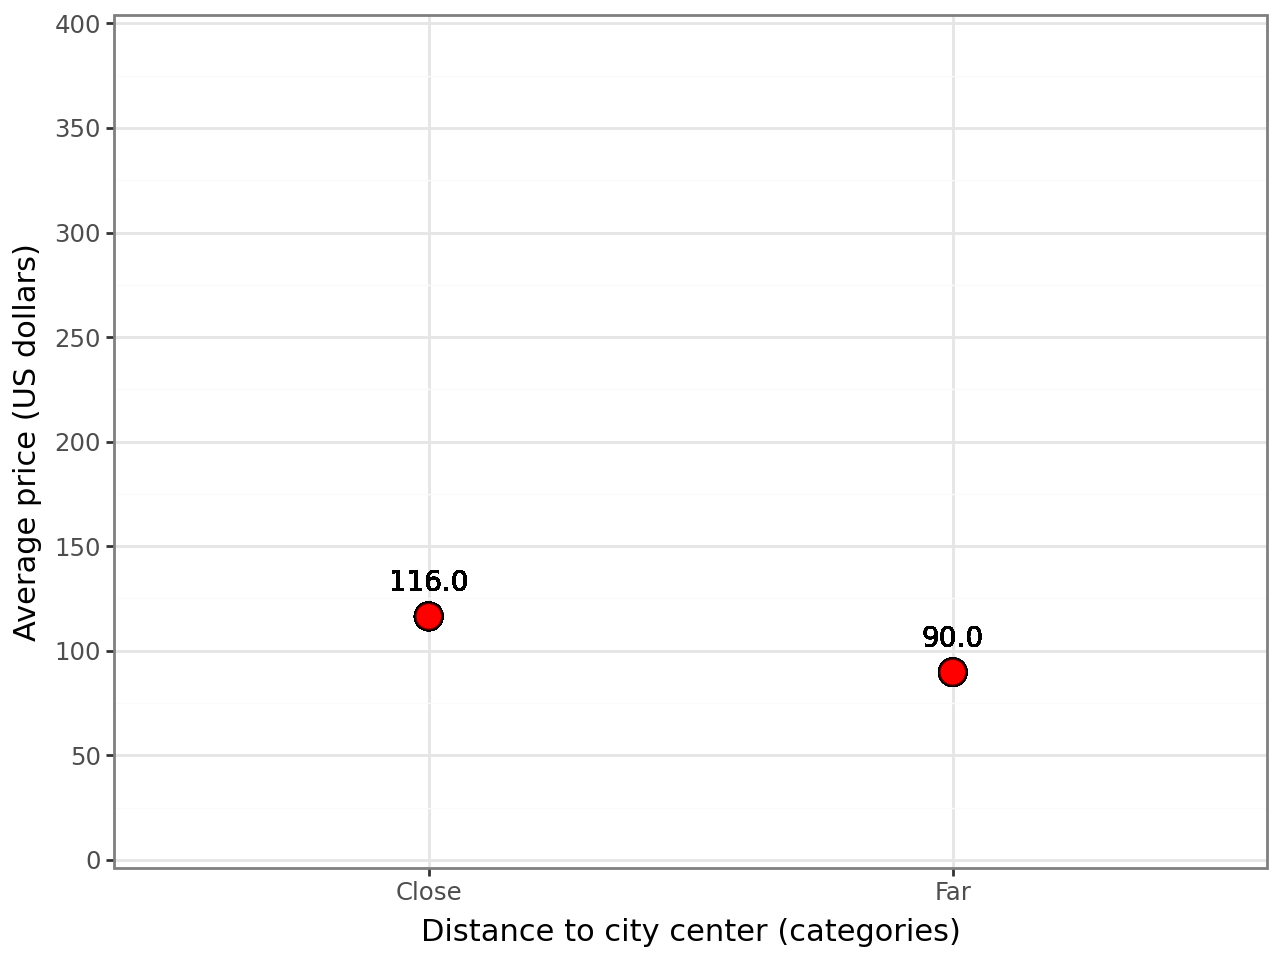

In [12]:
(
    ggplot(data=hotels)
    + geom_point(
        aes(x="dist2", y="Eprice_cat2"), size=5, alpha=0.4, fill="red", na_rm=True
    )
    + geom_text(
        aes(x="dist2", y="Eprice_cat2 + 16", label="round(Eprice_cat2, 0)"),
        color="black",
        size=10,
    )
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=np.arange(0, 401, 50)
    )
    + expand_limits(y=0.01)
    + scale_x_discrete()
    + labs(x="Distance to city center (categories)", y="Average price (US dollars)")
    + theme_bw()
)

###  Pre-specified Categories With Means (4 Distance Categories)

Below 1, between 1 and 2, between 2 and 3 and above 3 -> x value will be the midpoint

In [9]:
hotels["dist4"] = (
    0.5
    + np.where(hotels["distance"] >= 1, 1, 0)
    + np.where(hotels["distance"] >= 2, 1, 0)
    + np.where(hotels["distance"] >= 3, 2.5, 0)
)

Add mean values for price given each group

In [10]:
hotels["Eprice_cat4"] = hotels.groupby("dist4")["price"].transform("mean")

In [11]:
(
    hotels.melt(id_vars="dist4", value_vars=["distance", "price"])
    .groupby(["dist4", "variable"])
    .agg(["mean", "std", "min", "max", "count"])
    .round(2)
)

value                          
                  mean    std   min    max count
dist4 variable                                  
0.5   distance    0.55   0.28   0.0    0.9    81
      price     132.91  38.54  68.0  242.0    81
1.5   distance    1.46   0.29   1.0    1.9    76
      price      98.86  40.89  54.0  383.0    76
2.5   distance    2.35   0.32   2.0    2.9    22
      price      97.55  40.39  54.0  208.0    22
5.0   distance    3.88   0.76   3.0    6.6    28
      price      83.57  22.60  50.0  156.0    28

Make a graph for each segment

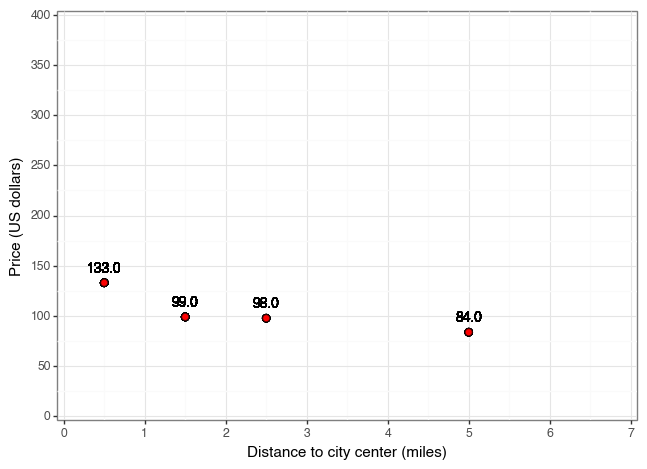

<Figure Size: (640 x 480)>

In [14]:
(
    ggplot(data=hotels)
    + geom_point(
        aes(x="dist4", y="Eprice_cat4"), size=2.5, fill="red", alpha=0.4, na_rm=True
    )
    + geom_text(
        aes(x="dist4", y="Eprice_cat4 + 15", label="round(Eprice_cat4)"),
        color="black",
        size=10,
    )
    + expand_limits(x=0.01, y=0.01)
    + coord_cartesian(xlim=(0, 7), ylim=(0, 400))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=np.arange(0, 401, 50)
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 7), breaks=[0, 1, 2, 3, 4, 5, 6, 7]
    )
    + labs(x="Distance to city center (miles)", y="Price (US dollars)")
    + theme_bw()
)

What actually is happening is a: \
scatterplot with step function (we use 1km bits for simplicity using 4 bits for 3-7km)

In [12]:
hotels["dist4_s"] = (
    np.where(hotels["distance"] >= 1, 1, 0)
    + np.where(hotels["distance"] >= 2, 1, 0)
    + np.where(hotels["distance"] >= 3, 1, 0)
    + np.where(hotels["distance"] >= 4, 1, 0)
    + np.where(hotels["distance"] >= 5, 1, 0)
    + np.where(hotels["distance"] >= 6, 1, 0)
)

hotels["xend"] = hotels["dist4_s"] + 1
hotels["yend"] = hotels["Eprice_cat4"]

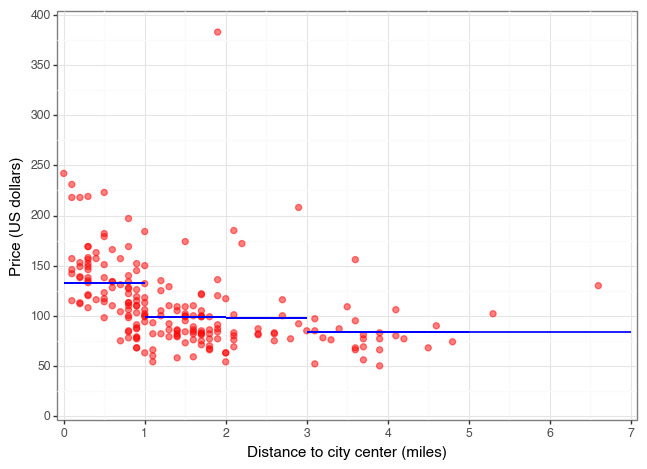

<Figure Size: (640 x 480)>

In [16]:
p1 + geom_segment(
    aes(x="dist4_s", y="yend", xend="xend", yend="yend"),
    color="blue",
    size=0.7,
    na_rm=True,
)

###  Lowess Non-parametric Regression

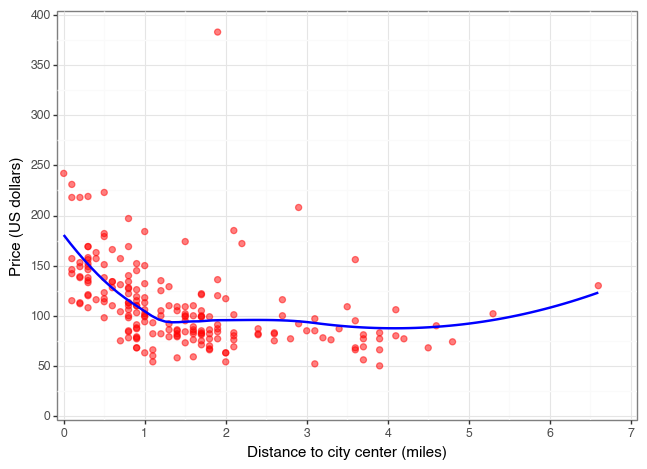

<Figure Size: (640 x 480)>

In [17]:
p1 + geom_smooth(aes(x="distance", y="price"), color="blue", method="loess", se=False)

- Advantage: \
   smooth curve which represent the pattern of association pretty flexibly!
-  Disadvantage: \
   no measurable properties: it smooth over the observations with an 'optimal' bandwidth.

**NOTE:** This codechunk results in error for Windows users. See: https://github.com/has2k1/scikit-misc/issues/12

### Simple Linear Regression -- parameters

#### Random 4 observation

In [13]:
rnd_hotels = hotels.sample(4,random_state=123)[["hotel_id","price","distance"]]
rnd_hotels

,hotel_id,price,distance
378,22348,77,3.7
191,22125,104,0.7
298,22250,184,1.0
379,22349,102,5.3


In [19]:
avg_price = np.mean(rnd_hotels[["price"]])
avg_price

116.75

In [14]:
avg_dist = np.mean(rnd_hotels[["distance"]])
avg_dist

2.675

In [15]:
# Compute variance-covariance
var_cov = np.cov(rnd_hotels["distance"],rnd_hotels["price"])
var_cov


array([[   4.8825    ,  -55.64166667],
       [ -55.64166667, 2160.91666667]])

In [22]:
beta = var_cov[0][1]/var_cov[0][0]
beta

-11.396142686465268

In [23]:
alpha = avg_price - beta*avg_dist
alpha

147.23468168629458

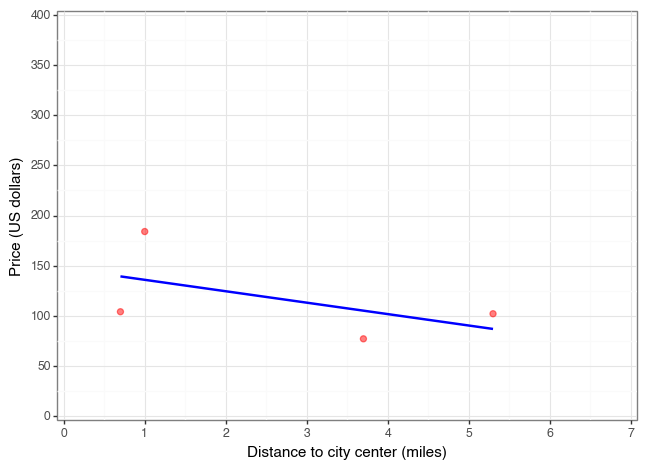

<Figure Size: (640 x 480)>

In [24]:
p2 = (
    ggplot(data=rnd_hotels)
    + geom_point(aes(x="distance", y="price"), color="red", size=2, alpha=0.5)
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 7), breaks=range(0, 8))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=np.arange(0, 401, 50)
    )
    + labs(x="Distance to city center (miles)", y="Price (US dollars)")
    + theme_bw()
)
p2 + geom_smooth(
    aes(x="distance", y="price"), method="lm", color="blue", formula="y~x", se=False
)

How to quantify linear regression: \
Remember: $y = \alpha + \beta * x + \epsilon$

In Python, the [statsmodels](https://www.statsmodels.org/stable/index.html) package is usually used to estimate regressions

In [17]:
import statsmodels.formula.api as smf
from mizani.formatters import percent_format

We use the statsmodels formula api, where you can give the equations as a string.
To replicate what we have done we can use the simple following commands:

In [20]:
rnd_reg = smf.ols("price ~ distance", data=rnd_hotels).fit()
print(rnd_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8306
Date:                Sat, 09 Nov 2024   Prob (F-statistic):              0.458
Time:                        18:54:42   Log-Likelihood:                -19.762
No. Observations:                   4   AIC:                             43.52
Df Residuals:                       2   BIC:                             42.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    147.2347     41.126      3.580      0.0

C:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.


#### All observations

Now, do the same analysis but with all observations!

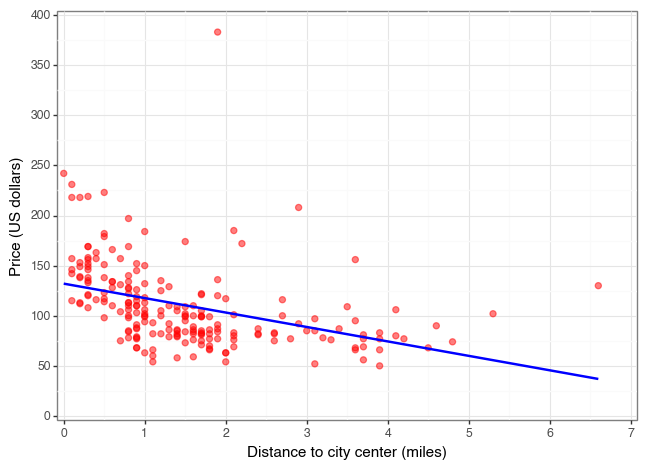

<Figure Size: (640 x 480)>

In [27]:
p1 + geom_smooth(
    aes(x="distance", y="price"), method="lm", color="blue", formula="y~x", se=False
)

 Simple model, with homoskedastic SE

In [28]:
simple_reg = smf.ols("price ~ distance", data=hotels).fit()
print(simple_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     38.20
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.39e-09
Time:                        12:45:00   Log-Likelihood:                -1050.3
No. Observations:                 207   AIC:                             2105.
Df Residuals:                     205   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.0170      4.474     29.511      0.0

Its wasy to compare two regression output tables using the stargazer package

In [29]:
from stargazer.stargazer import Stargazer

In [30]:
table = Stargazer([rnd_reg, simple_reg])
table.rename_covariates({"Intercept": "Constant"})
table.custom_columns(["Random 4 obs.", "ALL obs."], [1, 1])
table

## Analysis of the Linear Regression model
   - price prediction of a model
   - errors of predictions

### Random 4 observations -- R2

In [31]:
# Predicted values
rnd_hotels["y_pred"] = rnd_reg.predict()
# Errors
rnd_hotels["err"] = rnd_hotels["price"] - rnd_hotels["y_pred"]

To calculate R2 we need the variance of the outcome (price) and its predicted values

In [32]:
print(np.cov(rnd_hotels['price']))
print(np.cov(rnd_hotels['y_pred']))

2160.9166666666665
634.10037264607


Now, R2 is nothing but the ratio for the variance of the predicted and actual outcomes

In [33]:
np.cov(rnd_hotels['y_pred'])/np.cov(rnd_hotels['price'])

0.2934404562783094

### All observations -- residuals

It is easy to save the predicted values and residuals

In [34]:
# Alternative ways to get the predicted values and error terms
hotels["predprice"] = simple_reg.fittedvalues
hotels["e"] = simple_reg.resid

Get the hotel, which is the most underpriced

In [35]:
hotels.sort_values(by="e").head(1)

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,rating,dist2,Eprice_cat2,dist4,Eprice_cat4,dist4_s,xend,yend,predprice,e
153,Austria,Vienna,63.0,City centre,Donauturm,Josefstadt,54,Vienna,3.0,3.0,...,3.2,Close,116.426752,1.5,98.855263,1,2,98.855263,116.16991,-62.16991


probably we are only interested in hotel_id, distance, price, prediction and error values:

In [36]:
hotels.sort_values(by="e").head(1).filter(["hotel_id","distance","price","predprice","e"])

,hotel_id,distance,price,predprice,e
153,22080,1.1,54,116.16991,-62.16991


 Interpret the result!

We can get the 5 most overpriced five hotels

In [37]:
hotels.sort_values(by="e", ascending=False).head(5).filter(
    ["hotel_id", "distance", "price", "predprice", "e"]
)

,hotel_id,distance,price,predprice,e
247,22193,1.9,383,104.644774,278.355226
26,21930,2.9,208,90.238353,117.761647
128,22050,0.0,242,132.016973,109.983027
110,22031,0.1,231,130.576331,100.423669
129,22051,0.5,223,124.813762,98.186238


Checking the histogram of residuals:\
we can better understand about how well we can predict the prices\
notes:
   - we picked previously the smallest and 5 largest values from here
   - on average we will have 0 error, as this is a property of the OLS estimator

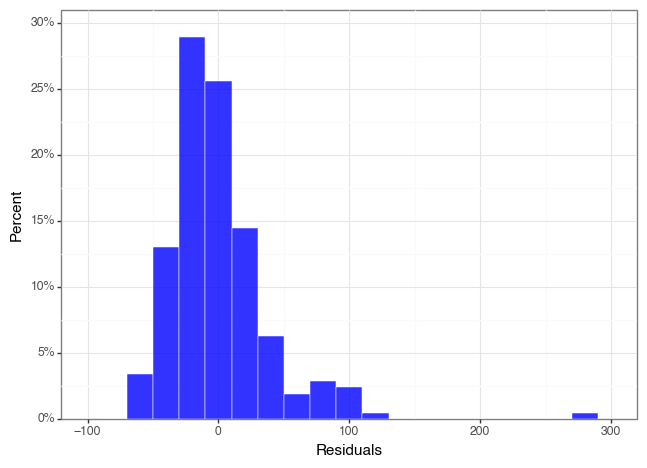

<Figure Size: (640 x 480)>

In [38]:
(
    ggplot(hotels, aes(x="e"))
    + geom_histogram(
        aes(y=after_stat("count / np.sum(count)")),
        binwidth=20,
        fill="blue",
        color="white",
        size=0.2,
        alpha=0.8,
        na_rm=True,
    )
    + labs(x="Residuals", y="Percent")
    + scale_x_continuous(limits=(-100, 300), breaks=np.arange(-100, 301, 100))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.31),
        breaks=np.arange(0, 0.31, 0.05),
        labels=percent_format(),
    )
    + theme_bw()
)

We can make a pretty graph with the bottom and top 5 deals:

Create a factor variable with 4 possible values

In [39]:
hotels["reg1_res"] = np.where(hotels["e"] >= 0, "overpriced", "underpriced")

hotels["reg1_res"] = np.where(
    hotels["hotel_id"].isin(
        hotels.sort_values(by="e", ascending=False).head(5)["hotel_id"].tolist()
    ),
    "top5",
    hotels["reg1_res"],
)
hotels["reg1_res"] = np.where(
    hotels["hotel_id"].isin(
        hotels.sort_values(by="e", ascending=False).tail(5)["hotel_id"].tolist()
    ),
    "bottom5",
    hotels["reg1_res"],
)

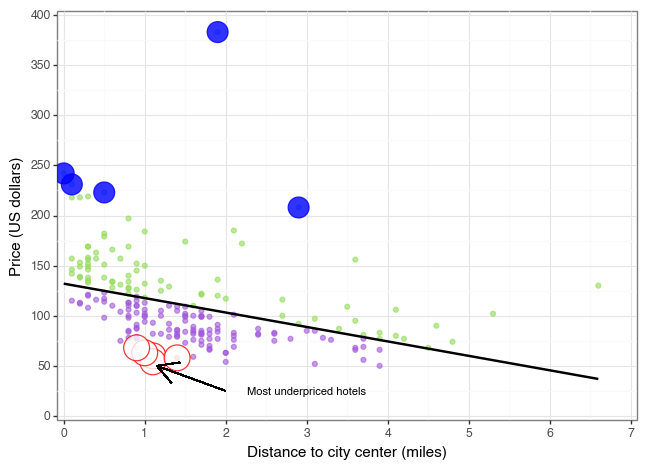

<Figure Size: (640 x 480)>

In [40]:
(
    ggplot(hotels, aes(x="distance", y="price"))
    + geom_point(aes(color="reg1_res"), alpha=0.6)
    + geom_point(
        hotels.loc[lambda x: x["reg1_res"] == "top5"], alpha=0.8, size=8, color="blue"
    )
    + geom_point(
        hotels.loc[lambda x: x["reg1_res"] == "bottom5"],
        alpha=0.8,
        size=10,
        color="red",
        fill="white",
    )
    + geom_smooth(method="lm", size=1, se=False, formula="y~x")
    + coord_cartesian(xlim=(0, 7), ylim=(0, 400))
    + expand_limits(x=0.01, y=0.01)
    + scale_color_discrete(guide=False)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 7), breaks=np.arange(0, 8, 1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=np.arange(0, 401, 50)
    )
    + labs(x="Distance to city center (miles)", y="Price (US dollars)")
    + geom_segment(aes(x=2, y=25, xend=1.15, yend=50), arrow=arrow())
    + annotate("text", x=3, y=25, label="Most underpriced hotels", size=8)
    + theme_bw()
)

## Log models 

Take log price

In [41]:
hotels["lnprice"] = np.log(hotels["price"])

Correct distance2 measure: no closer than 0.05km

In [42]:
hotels["distance2"] = np.where(hotels["distance"] < 0.05, 0.05, hotels["distance"])

Take the log of distance2

In [43]:
hotels["lndistance"] = np.log(hotels["distance2"])

Describe price and ln price

In [44]:
hotels.filter(["price", "lnprice"]).describe(percentiles=[0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
price,207.0,109.975845,42.221381,50.000000,82.000000,100.00000,129.500000,183.400000,383.000000
lnprice,207.0,4.640219,0.336751,3.912023,4.406719,4.60517,4.863673,5.211657,5.948035


### Running multiple regressions:

1. Level-level linear regression

In [45]:
reg1 = smf.ols("price ~ distance", data=hotels).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     38.20
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.39e-09
Time:                        12:45:01   Log-Likelihood:                -1050.3
No. Observations:                 207   AIC:                             2105.
Df Residuals:                     205   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.0170      4.474     29.511      0.0

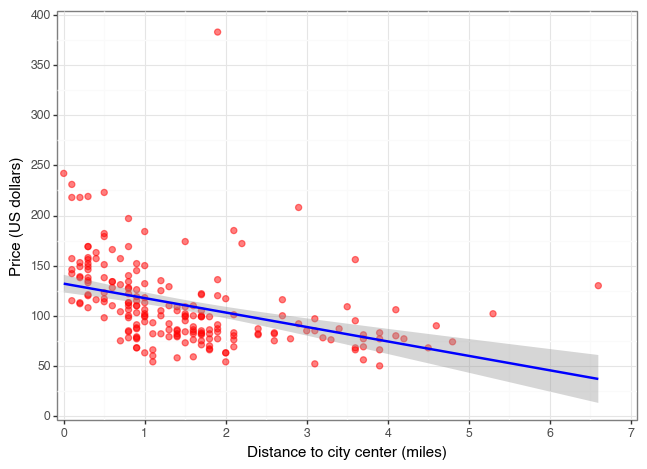

<Figure Size: (640 x 480)>

In [46]:
f1 = p1 + geom_smooth(
    aes(x="distance", y="price"), method="lm", color="blue", formula="y~x", se=True
)
f1

2. Level-log linear regression

In [47]:
reg2 = smf.ols("price ~ lndistance", data=hotels).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     79.58
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.61e-16
Time:                        12:45:01   Log-Likelihood:                -1034.1
No. Observations:                 207   AIC:                             2072.
Df Residuals:                     205   BIC:                             2079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.4171      2.512     44.757      0.0

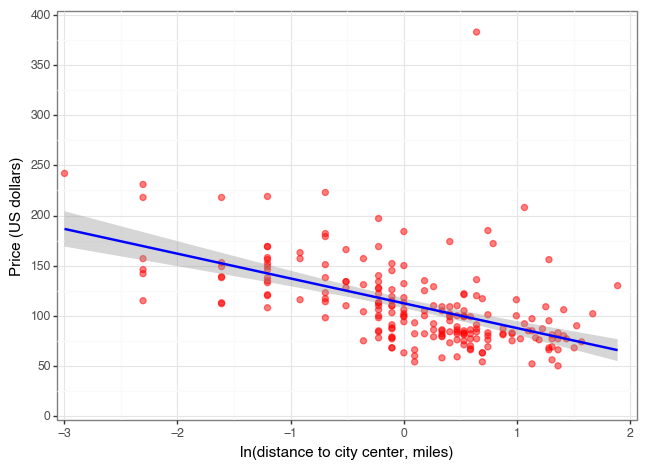

<Figure Size: (640 x 480)>

In [48]:
f2 = (
    ggplot(data=hotels)
    + geom_point(aes(x="lndistance", y="price"), color="red", size=2, alpha=0.5)
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(-3, 2), breaks=range(-3, 3))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=np.arange(0, 401, 50)
    )
    + labs(x="ln(distance to city center, miles)", y="Price (US dollars)")
    + theme_bw()
    + geom_smooth(
        aes(x="lndistance", y="price"),
        method="lm",
        color="blue",
        formula="y~x",
        se=True,
    )
)
f2

3. Log-level linear regression

In [49]:
reg3 = smf.ols("lnprice ~ distance", data=hotels).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     52.90
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           7.30e-12
Time:                        12:45:01   Log-Likelihood:                -44.160
No. Observations:                 207   AIC:                             92.32
Df Residuals:                     205   BIC:                             98.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8411      0.035    139.720      0.0

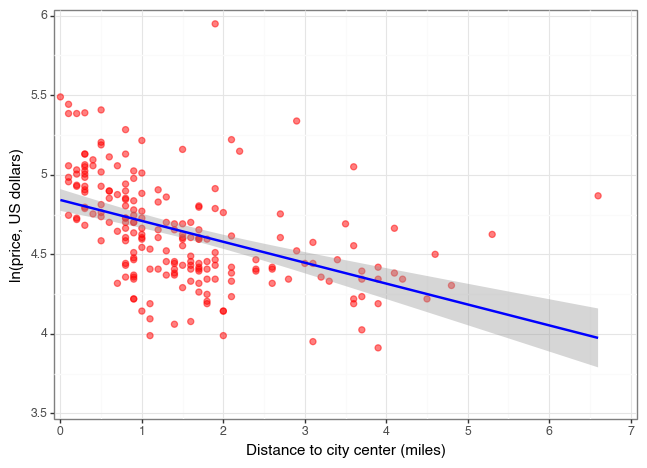

<Figure Size: (640 x 480)>

In [50]:
f3 = (
    ggplot(data=hotels)
    + geom_point(aes(x="distance", y="lnprice"), color="red", size=2, alpha=0.5)
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 7), breaks=range(0, 8))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(3.5, 6), breaks=np.arange(3.5, 7, 0.5)
    )
    + labs(x="Distance to city center (miles)", y="ln(price, US dollars)")
    + theme_bw()
    + geom_smooth(
        aes(x="distance", y="lnprice"),
        method="lm",
        color="blue",
        formula="y~x",
        se=True,
    )
)
f3

4. Log-log linear regression

In [51]:
reg4 = smf.ols("lnprice ~ lndistance", data=hotels).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           8.18e-20
Time:                        12:45:01   Log-Likelihood:                -25.911
No. Observations:                 207   AIC:                             55.82
Df Residuals:                     205   BIC:                             62.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6615      0.019    241.926      0.0

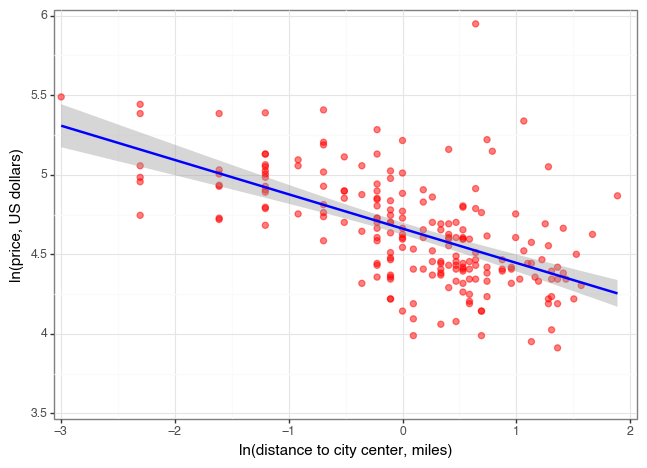

<Figure Size: (640 x 480)>

In [52]:
f4 = (
    ggplot(data=hotels)
    + geom_point(aes(x="lndistance", y="lnprice"), color="red", size=2, alpha=0.5)
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(-3, 2), breaks=range(-3, 3))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(3.5, 6), breaks=np.arange(3.5, 7, 0.5)
    )
    + labs(x="ln(distance to city center, miles)", y="ln(price, US dollars)")
    + theme_bw()
    + geom_smooth(
        aes(x="lndistance", y="lnprice"),
        method="lm",
        color="blue",
        formula="y~x",
        se=True,
    )
)
f4

#### Checking and comparing all models:


In [53]:
table = Stargazer([reg1, reg2, reg3, reg4])
table.rename_covariates({"Intercept": "Constant"})
table.custom_columns(["Level-Level", "Level-Log", "Log-Level", "Log-Log"], [1, 1, 1, 1])
table